In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [39]:
# Set the display properties so that we can inspect the data
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [26]:
filepath = os.path.join("listings.csv")

In [27]:
listings_df = pd.read_csv(filepath)

listings_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,61,62,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2060,https://www.airbnb.com/rooms/2060,20200608144437,2020-06-09,Modern NYC,NaN,"Lovely, spacious, sunny 1 BR apartment in 6th ...","Lovely, spacious, sunny 1 BR apartment in 6th ...",none,NaN,...,f,f,flexible,f,f,1,0,1,0,0.01
1,2595,https://www.airbnb.com/rooms/2595,20200608144437,2020-06-09,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.37
2,3831,https://www.airbnb.com/rooms/3831,20200608144437,2020-06-09,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",We host on the entire top floor of our double-...,"Enjoy 500 s.f. top floor in 1899 brownstone, w...",none,Just the right mix of urban center and local n...,...,f,f,flexible,f,f,1,1,0,0,4.64
3,5099,https://www.airbnb.com/rooms/5099,20200608144437,2020-06-09,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,f,f,moderate,t,t,1,1,0,0,0.58
4,5121,https://www.airbnb.com/rooms/5121,20200608144437,2020-06-09,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.37


In [28]:
print(listings_df.shape)

(49530, 106)


In [29]:
listings_df.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [30]:
cleancol_df = listings_df.drop(['listing_url', 
                                'scrape_id', 
                                'last_scraped', 
                                'experiences_offered', 
                                'thumbnail_url', 
                                'medium_url', 
                                'picture_url', 
                                'xl_picture_url', 
                                'host_url', 
                                'host_name', 
                                'host_thumbnail_url', 
                                'host_picture_url', 
                                'host_has_profile_pic', 
                                'street', 
                                'market', 
                                'smart_location', 
                                'country', 
                                'minimum_minimum_nights', 
                                'maximum_minimum_nights', 
                                'minimum_maximum_nights', 
                                'minimum_nights_avg_ntm', 
                                'maximum_nights_avg_ntm',
                                'maximum_maximum_nights',
                                'square_feet',
                                'calendar_updated', 
                                'has_availability', 
                                'availability_30', 
                                'availability_60', 
                                'availability_90', 
                                'calendar_last_scraped', 
                                'number_of_reviews_ltm', 
                                'first_review', 
                                'last_review', 
                                'review_scores_accuracy', 
                                'review_scores_cleanliness', 
                                'review_scores_checkin', 
                                'review_scores_communication', 
                                'review_scores_location', 
                                'requires_license', 
                                'license', 
                                'jurisdiction_names', 
                                'instant_bookable', 
                                'is_business_travel_ready', 
                                'cancellation_policy', 
                                'require_guest_profile_picture', 
                                'require_guest_phone_verification', 
                                'calculated_host_listings_count', 
                                'calculated_host_listings_count_entire_homes', 
                                'calculated_host_listings_count_private_rooms', 
                                'calculated_host_listings_count_shared_rooms', 
                                'reviews_per_month'], axis=1)

In [31]:
print(cleancol_df.shape)

(49530, 55)


In [32]:
cleancol_df.dtypes

id                                int64
name                             object
summary                          object
space                            object
description                      object
neighborhood_overview            object
notes                            object
transit                          object
access                           object
interaction                      object
house_rules                      object
host_id                           int64
host_since                       object
host_location                    object
host_about                       object
host_response_time               object
host_response_rate               object
host_acceptance_rate             object
host_is_superhost                object
host_neighbourhood               object
host_listings_count             float64
host_total_listings_count       float64
host_verifications               object
host_identity_verified           object
neighbourhood                    object


In [33]:
cleancol_df['is_location_exact']

0        t
1        f
2        t
3        f
4        f
        ..
49525    t
49526    t
49527    t
49528    t
49529    t
Name: is_location_exact, Length: 49530, dtype: object

In [34]:
cleancol_df.isna().sum()

id                                  0
name                               18
summary                          2495
space                           14111
description                      1290
neighborhood_overview           17424
notes                           29830
transit                         17137
access                          23662
interaction                     20051
house_rules                     19903
host_id                             0
host_since                          6
host_location                     145
host_about                      19789
host_response_time              27316
host_response_rate              27316
host_acceptance_rate            15396
host_is_superhost                   6
host_neighbourhood               7756
host_listings_count                 6
host_total_listings_count           6
host_verifications                  0
host_identity_verified              6
neighbourhood                      11
neighbourhood_cleansed              0
neighbourhoo

In [35]:
exact_location_df = cleancol_df.loc[(cleancol_df["is_location_exact"] == "t"), :]

exact_location_df

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,...,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_value
0,2060,Modern NYC,NaN,"Lovely, spacious, sunny 1 BR apartment in 6th ...","Lovely, spacious, sunny 1 BR apartment in 6th ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,$0.00,1,730,365,1,80.0,NaN
2,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",We host on the entire top floor of our double-...,"Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,"Same day reservations are welcome, but you MUS...",B52 bus for a 10-minute ride to downtown Brook...,"You will have the private, exclusive use of an...","We'll be around, but since you have the top fl...",...,$500.00,NaN,1,$0.00,1,730,276,322,89.0,8.0
5,5136,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,Sleeps 4 comfortably- king bed in master bedro...,We welcome you to stay in our lovely 2 br dupl...,NaN,We have two small children- so there are many ...,NaN,"Entire duplex apt is free to use, except for c...",guests can email me during their stay and can ...,...,NaN,NaN,4,$25.00,14,1125,358,1,97.0,10.0
6,5178,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Reservation should be made at least a few days...,NaN,Bathroom is shared with the host but the kitch...,NaN,...,NaN,$15.00,1,$12.00,2,14,294,473,84.0,9.0
7,5203,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Stay in my family's little guest room and enj...,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,"Because we are an active family, I guarantee t...",The number 1 train stops at 110th Street/Cathe...,Guests will be able to come and go as they nee...,My modern family is super busy with lots of co...,...,NaN,NaN,1,$0.00,2,14,0,118,98.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49525,43702714,Spacious and Luxurious Noho 3 Bedroom Apartment,Beautiful spacious NoHo apartment. Minutes awa...,NaN,Beautiful spacious NoHo apartment. Minutes awa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,$0.00,3,1125,365,0,NaN,NaN
49526,43702765,2-bedroom entire place for you in Bushwick,"2-bedroom in Bushwick, Brooklyn, 1000 sqf, 2 b...",NaN,"2-bedroom in Bushwick, Brooklyn, 1000 sqf, 2 b...",NaN,NaN,NaN,NaN,Email and text any time,...,$0.00,$50.00,1,$0.00,3,1125,135,0,NaN,NaN
49527,43703128,"Simple Spacious Manhattan Room for 2Near 2,3 T...",This is an affordable master bedroom for 2 in ...,*************************************** Curren...,This is an affordable master bedroom for 2 in ...,Harlem is one of the largest areas in Manhatta...,"Brand new sheets, pillowcases, and comfortable...","2,3 Train 5 mins to 134 St Station 7 mins to ...",There is a kitchen with kitchenware and bathro...,I’m taking offs on Sundays. I will reply on Mo...,...,$0.00,$30.00,1,$0.00,28,365,8,0,NaN,NaN
49528,43703156,Cosy Room Available in East Village,"10 minutes from L train and F Train Coffee, re...",NaN,"10 minutes from L train and F Train Coffee, re...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,$0.00,2,2,12,0,NaN,NaN


In [36]:
print(exact_location_df.shape)

(46939, 55)


In [145]:
exact_location_df.to_csv('listings_cleaned.csv')

In [37]:
exact_location_df.dtypes

id                                int64
name                             object
summary                          object
space                            object
description                      object
neighborhood_overview            object
notes                            object
transit                          object
access                           object
interaction                      object
house_rules                      object
host_id                           int64
host_since                       object
host_location                    object
host_about                       object
host_response_time               object
host_response_rate               object
host_acceptance_rate             object
host_is_superhost                object
host_neighbourhood               object
host_listings_count             float64
host_total_listings_count       float64
host_verifications               object
host_identity_verified           object
neighbourhood                    object


In [ ]:
#Create function to iterate through column and take out unnecessary "$" for example price has a few values that
# are objects because of "$" instead of being an integer.

In [2]:
clean_file_path = os.path.join("listings_cleaned.csv")

In [3]:
df = pd.read_csv(clean_file_path)

df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (44,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,id,name,summary,space,description,neighborhood_overview,notes,transit,access,...,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_value
0,0,2060,Modern NYC,NaN,"Lovely, spacious, sunny 1 BR apartment in 6th ...","Lovely, spacious, sunny 1 BR apartment in 6th ...",NaN,NaN,NaN,NaN,...,NaN,NaN,1,$0.00,1,730,365,1,80.0,NaN
1,2,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",We host on the entire top floor of our double-...,"Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,"Same day reservations are welcome, but you MUS...",B52 bus for a 10-minute ride to downtown Brook...,"You will have the private, exclusive use of an...",...,$500.00,NaN,1,$0.00,1,730,276,322,89.0,8.0
2,5,5136,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,Sleeps 4 comfortably- king bed in master bedro...,We welcome you to stay in our lovely 2 br dupl...,NaN,We have two small children- so there are many ...,NaN,"Entire duplex apt is free to use, except for c...",...,NaN,NaN,4,$25.00,14,1125,358,1,97.0,10.0
3,6,5178,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Reservation should be made at least a few days...,NaN,Bathroom is shared with the host but the kitch...,...,NaN,$15.00,1,$12.00,2,14,294,473,84.0,9.0
4,7,5203,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Stay in my family's little guest room and enj...,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,"Because we are an active family, I guarantee t...",The number 1 train stops at 110th Street/Cathe...,Guests will be able to come and go as they nee...,...,NaN,NaN,1,$0.00,2,14,0,118,98.0,10.0


In [24]:
clean1_df = df.loc[(df["state"] == "NY"), :]

print(clean1_df.shape)

(46922, 56)


In [19]:
#Iterate through rows and delete the "NY" from the zipcodes that have it
def missing_statistics(df):
    '''
        Calculates missing value statistics for a given dataframe and
        returns a dataframe containing number of missing values per column
        and the percentage of values missing per column.
        arguments:
            df: the dataframe for which missing values need to be calculated.
    '''
    missing_stats = df.isnull().sum().to_frame()
    missing_stats.columns = ['num_missing']
    missing_stats['pct_missing'] = np.round(100 * (missing_stats['num_missing'] / df.shape[0]))
    missing_stats.sort_values(by='num_missing', ascending=False, inplace=True)

    return missing_stats

In [20]:
missing_stats = missing_statistics(clean1_df)

missing_stats

,num_missing,pct_missing
monthly_price,42609,91.0
weekly_price,41902,89.0
notes,28265,60.0
host_response_rate,25821,55.0
host_response_time,25821,55.0
access,22410,48.0
interaction,18860,40.0
house_rules,18843,40.0
host_about,18745,40.0
neighborhood_overview,16421,35.0


In [21]:
cols_to_drop = list(missing_stats[missing_stats.pct_missing > 20].index)
cols_to_drop #Keep cleaning fee and security deposit

['monthly_price',
 'weekly_price',
 'notes',
 'host_response_rate',
 'host_response_time',
 'access',
 'interaction',
 'house_rules',
 'host_about',
 'neighborhood_overview',
 'security_deposit',
 'transit',
 'host_acceptance_rate',
 'space',
 'review_scores_value',
 'review_scores_rating',
 'cleaning_fee']

In [71]:
clean2_df = clean1_df.drop(['monthly_price',
 'weekly_price',
 'notes',
 'host_response_rate',
 'host_response_time',
 'access',
 'interaction',
 'house_rules',
 'host_about',
 'neighborhood_overview',
 'transit',
 'host_acceptance_rate',
 'space',
 'review_scores_value',
 'review_scores_rating'], axis='columns')

clean2_df.count()

Unnamed: 0                      46922
id                              46922
name                            46907
summary                         44612
description                     45744
host_id                         46922
host_since                      46916
host_location                   46789
host_is_superhost               46916
host_neighbourhood              40923
host_listings_count             46916
host_total_listings_count       46916
host_verifications              46922
host_identity_verified          46916
neighbourhood                   46911
neighbourhood_cleansed          46922
neighbourhood_group_cleansed    46922
city                            46798
state                           46922
zipcode                         46903
country_code                    46922
latitude                        46922
longitude                       46922
is_location_exact               46922
property_type                   46922
room_type                       46922
accommodates

In [72]:
print(clean2_df.shape)

(46922, 41)


In [73]:
#Check Object values so we can convert to categorical or boolean data types
clean2_df.select_dtypes(['object']).head()

,name,summary,description,host_since,host_location,host_is_superhost,host_neighbourhood,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,country_code,is_location_exact,property_type,room_type,bed_type,amenities,price,security_deposit,cleaning_fee,extra_people
0,Modern NYC,NaN,"Lovely, spacious, sunny 1 BR apartment in 6th ...",2008-08-18,US,f,Washington Heights,['reviews'],f,Washington Heights,Washington Heights,Manhattan,New York,NY,10040,US,t,Other,Private room,Real Bed,"{Internet,Wifi}",$100.00,NaN,NaN,$0.00
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",2008-12-07,"New York, New York, United States",f,Clinton Hill,"['email', 'phone', 'reviews', 'offline_governm...",t,Brooklyn,Clinton Hill,Brooklyn,Brooklyn,NY,11238,US,t,Guest suite,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$89.00,$500.00,NaN,$0.00
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,We welcome you to stay in our lovely 2 br dupl...,2009-02-03,"New York, New York, United States",f,Greenwood Heights,"['email', 'phone', 'reviews']",f,Greenwood Heights,Sunset Park,Brooklyn,Brooklyn,NY,11232,US,t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$253.00,NaN,NaN,$25.00
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,Please don’t expect the luxury here just a bas...,2009-03-03,"New York, New York, United States",f,Hell's Kitchen,"['email', 'phone', 'facebook', 'reviews']",f,Manhattan,Hell's Kitchen,Manhattan,New York,NY,10019,US,t,Apartment,Private room,Real Bed,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",$79.00,NaN,$15.00,$12.00
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...","Our best guests are seeking a safe, clean, spa...",2009-02-05,"New York, New York, United States",f,Upper West Side,"['email', 'phone', 'facebook', 'google', 'revi...",t,Upper West Side,Upper West Side,Manhattan,New York,NY,10025,US,t,Apartment,Private room,Real Bed,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",$79.00,NaN,NaN,$0.00


In [74]:
categorical_types = ['host_is_superhost',
                     'is_location_exact',
                     'property_type',
                     'room_type',
                     'bed_type']

In [75]:
clean2_df[categorical_types] = clean2_df[categorical_types].apply(lambda x: x.astype('category'),
                                                                                axis='rows')
clean2_df[categorical_types].dtypes

host_is_superhost    category
is_location_exact    category
property_type        category
room_type            category
bed_type             category
dtype: object

In [76]:
clean2_df.property_type.value_counts()

Apartment                 36381
House                      3743
Townhouse                  1736
Condominium                1663
Loft                       1280
Serviced apartment          476
Boutique hotel              438
Guest suite                 406
Hotel                       292
Other                        95
Resort                       72
Guesthouse                   70
Bed and breakfast            61
Hostel                       45
Aparthotel                   30
Bungalow                     23
Tiny house                   21
Villa                        20
Camper/RV                    16
Boat                          7
Cottage                       7
Earth house                   6
Barn                          4
Tent                          4
Cave                          4
Castle                        3
Dome house                    3
Casa particular (Cuba)        3
Cabin                         2
Houseboat                     2
Island                        2
Bus     

In [77]:
clean2_df.head()

,Unnamed: 0,id,name,summary,description,host_id,host_since,host_location,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,country_code,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews
0,0,2060,Modern NYC,NaN,"Lovely, spacious, sunny 1 BR apartment in 6th ...",2259,2008-08-18,US,f,Washington Heights,0.0,0.0,['reviews'],f,Washington Heights,Washington Heights,Manhattan,New York,NY,10040,US,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",$100.00,NaN,NaN,1,$0.00,1,730,365,1
1,2,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",4869,2008-12-07,"New York, New York, United States",f,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,Brooklyn,Clinton Hill,Brooklyn,Brooklyn,NY,11238,US,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$89.00,$500.00,NaN,1,$0.00,1,730,276,322
2,5,5136,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,We welcome you to stay in our lovely 2 br dupl...,7378,2009-02-03,"New York, New York, United States",f,Greenwood Heights,1.0,1.0,"['email', 'phone', 'reviews']",f,Greenwood Heights,Sunset Park,Brooklyn,Brooklyn,NY,11232,US,40.66120,-73.99423,t,Apartment,Entire home/apt,4,1.5,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$253.00,NaN,NaN,4,$25.00,14,1125,358,1
3,6,5178,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,Please don’t expect the luxury here just a bas...,8967,2009-03-03,"New York, New York, United States",f,Hell's Kitchen,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",f,Manhattan,Hell's Kitchen,Manhattan,New York,NY,10019,US,40.76489,-73.98493,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",$79.00,NaN,$15.00,1,$12.00,2,14,294,473
4,7,5203,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...","Our best guests are seeking a safe, clean, spa...",7490,2009-02-05,"New York, New York, United States",f,Upper West Side,1.0,1.0,"['email', 'phone', 'facebook', 'google', 'revi...",t,Upper West Side,Upper West Side,Manhattan,New York,NY,10025,US,40.80178,-73.96723,t,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",$79.00,NaN,NaN,1,$0.00,2,14,0,118


In [78]:
clean2_df.isna().sum()

Unnamed: 0                          0
id                                  0
name                               15
summary                          2310
description                      1178
host_id                             0
host_since                          6
host_location                     133
host_is_superhost                   6
host_neighbourhood               5999
host_listings_count                 6
host_total_listings_count           6
host_verifications                  0
host_identity_verified              6
neighbourhood                      11
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
city                              124
state                               0
zipcode                            19
country_code                        0
latitude                            0
longitude                           0
is_location_exact                   0
property_type                       0
room_type                           0
accommodates

In [79]:
clean2_df[['security_deposit', 'cleaning_fee']].fillna(0)

,security_deposit,cleaning_fee
0,0,0
1,$500.00,0
2,0,0
3,0,$15.00
4,0,0
...,...,...
46934,0,0
46935,$0.00,$50.00
46936,$0.00,$30.00
46937,0,0


In [80]:
import re
clean2_df['price'] = clean2_df.price.apply(lambda x:re.sub(r'[$,]', '', x)).astype('float')
clean2_df['extra_people'] = clean2_df.extra_people.apply(lambda x:re.sub(r'[$,]', '', x)).astype('float')

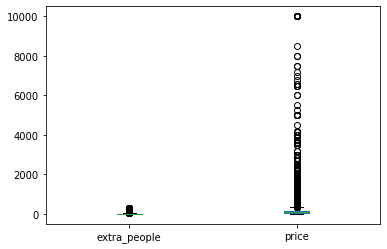

In [82]:
#Identify outliers
clean2_df[['extra_people', 'price']].plot(kind='box')

In [96]:
from sklearn.impute import SimpleImputer

categorical_missing_cols = categorical_types

float_missing_cols = ['bathrooms', 'beds', 'bedrooms']

In [93]:
def replace_missing_values(cols, df):
    '''
        Takes a list of columns and a dataframe and imputes based on
        the column type. If it is object type, then most_frequent value
        is used for imputation. If it is a float/int type, then the median
        value is used for imputation.
        arguments:
            cols: list of columns
            df : dataframe containing these columns.
        returns:
            df: the imputed dataframe
    '''
    for col in cols:
        if type(df[col].dtype) is pd.core.dtypes.dtypes.CategoricalDtype:
            print("Imputing {} column with most frequent value".format(col))
            mode_imputer = SimpleImputer(strategy='most_frequent')
            df.loc[:, col] = mode_imputer.fit_transform(df[[col]])
        elif df[col].dtype == 'float64' or df[col].dtype == 'int64':
            print("Imputing {} column with median value".format(col))
            median_imputer = SimpleImputer(strategy='median')
            df.loc[:, col] = median_imputer.fit_transform(df[[col]])
        else:
            raise ValueError("Invalid column type")

    return df

In [97]:
clean3_df = replace_missing_values(float_missing_cols, clean2_df)
clean3_df = replace_missing_values(categorical_missing_cols, clean2_df)

clean3_df.head()

Imputing bathrooms column with median value
Imputing beds column with median value
Imputing bedrooms column with median value
Imputing host_is_superhost column with most frequent value
Imputing is_location_exact column with most frequent value
Imputing property_type column with most frequent value
Imputing room_type column with most frequent value
Imputing bed_type column with most frequent value


,Unnamed: 0,id,name,summary,description,host_id,host_since,host_location,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,country_code,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews
0,0,2060,Modern NYC,NaN,"Lovely, spacious, sunny 1 BR apartment in 6th ...",2259,2008-08-18,US,f,Washington Heights,0.0,0.0,['reviews'],f,Washington Heights,Washington Heights,Manhattan,New York,NY,10040,US,40.85722,-73.93790,t,Other,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi}",100.0,NaN,NaN,1,0.0,1,730,365,1
1,2,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",4869,2008-12-07,"New York, New York, United States",f,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,Brooklyn,Clinton Hill,Brooklyn,Brooklyn,NY,11238,US,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",89.0,$500.00,NaN,1,0.0,1,730,276,322
2,5,5136,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,We welcome you to stay in our lovely 2 br dupl...,7378,2009-02-03,"New York, New York, United States",f,Greenwood Heights,1.0,1.0,"['email', 'phone', 'reviews']",f,Greenwood Heights,Sunset Park,Brooklyn,Brooklyn,NY,11232,US,40.66120,-73.99423,t,Apartment,Entire home/apt,4,1.5,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",253.0,NaN,NaN,4,25.0,14,1125,358,1
3,6,5178,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,Please don’t expect the luxury here just a bas...,8967,2009-03-03,"New York, New York, United States",f,Hell's Kitchen,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",f,Manhattan,Hell's Kitchen,Manhattan,New York,NY,10019,US,40.76489,-73.98493,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",79.0,NaN,$15.00,1,12.0,2,14,294,473
4,7,5203,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...","Our best guests are seeking a safe, clean, spa...",7490,2009-02-05,"New York, New York, United States",f,Upper West Side,1.0,1.0,"['email', 'phone', 'facebook', 'google', 'revi...",t,Upper West Side,Upper West Side,Manhattan,New York,NY,10025,US,40.80178,-73.96723,t,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",79.0,NaN,NaN,1,0.0,2,14,0,118


In [98]:
clean3_df.isna().sum()

Unnamed: 0                          0
id                                  0
name                               15
summary                          2310
description                      1178
host_id                             0
host_since                          6
host_location                     133
host_is_superhost                   0
host_neighbourhood               5999
host_listings_count                 6
host_total_listings_count           6
host_verifications                  0
host_identity_verified              6
neighbourhood                      11
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
city                              124
state                               0
zipcode                            19
country_code                        0
latitude                            0
longitude                           0
is_location_exact                   0
property_type                       0
room_type                           0
accommodates

In [101]:
clean3_df[['security_deposit', 'cleaning_fee']].fillna(0)

,security_deposit,cleaning_fee
0,0,0
1,$500.00,0
2,0,0
3,0,$15.00
4,0,0
...,...,...
46934,0,0
46935,$0.00,$50.00
46936,$0.00,$30.00
46937,0,0


In [102]:
clean3_df.to_csv('listings_clean.csv')